# Reinforcement Learning Course

### Limitations:
* For simple models, RL can be overkill and a waste of time; models with hyperparameter tuning are already powerful
* Assumed enviroment is Markovian; future states are based on current enviroment, cant account for random things happening when its deployed
* Can take very long time to train
* Can sometimes be not stable; model might start exploiting enviroment, and cap the rewards before truly fully exploring; mitigated with hyperparameters 

In [1]:
import os
import gymnasium as gym #openai gym alternative; https://gymnasium.farama.org/index.html
from stable_baselines3 import PPO #one of the many algorithms; https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

## Loading Enviroment
Can simulate real life enviroments to train more effciiently and in a more cost effetive manner.

* cartple: https://gymlibrary.dev/environments/classic_control/cart_pole/

### Enviroment spaces:
* Box: n dimentional tensor, **range of continus values**
    * Box(low=0, high=1, shape=(3,3)) # 3x3 matrix with values between 0 and 1

* Discrete: **range of discrete values**
    * Discrete(3) # 0, 1, 2
    
* MultiDiscrete: **range of discrete values**
    * MultiDiscrete([3, 2, 2]) # values between 0 and 2, 0 and 1, 0 and 1
    
* Tuple: **tuple of spaces**
    * Tuple([Discrete(3), Box(0, 1, shape=(3,3))]) # cannot be used in stable baselines
    
* Dict: **dictionary of spaces**
    * Dict({"position": Box(-1, 1, shape=(3,)), "velocity": Box(-1, 1, shape=(3,))})
    
* MultiBinary: **one hot encoded binary values**
    * MultiBinary(4) # 4 binary values

In [2]:
enviroment_name = "CartPole-v1"
env = gym.make(enviroment_name, render_mode="rgb_array") #from gym website

#### Core Env commands:
* env.reset
* env.render
* env.step
* env.close

In [3]:
# Reset the environment to its initial state, based on seed
env.reset()

(array([-0.04997943,  0.04242675,  0.01704825,  0.01823677], dtype=float32),
 {})

In [4]:
# env step
env.step(1) # observation, reward, terminated, truncated, info

(array([-0.04913089,  0.23730011,  0.01741299, -0.26901886], dtype=float32),
 1.0,
 False,
 False,
 {})

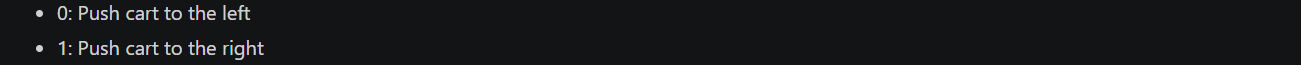

In [5]:
# action space
env.action_space

# Discrete 2, meaning 0 or 1, left and right only for this env

Discrete(2)

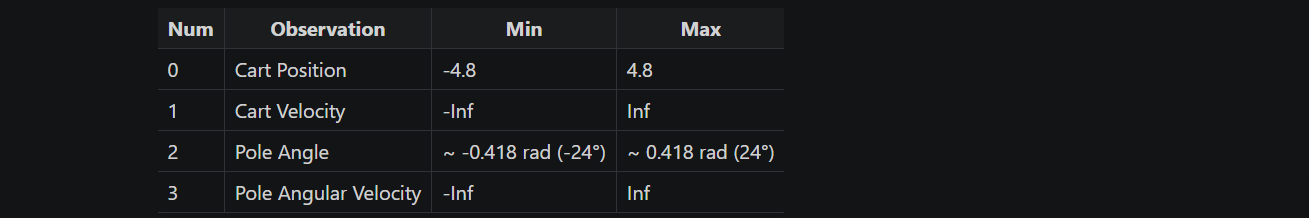

In [6]:
# obeservation space
env.observation_space

Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)

In [7]:
# show frames in ipynb
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

def show_frame(env):
    # Capture frame as RGB array
    frame = env.render()
    plt.imshow(frame)
    display(plt.gcf())
    clear_output(wait=True)

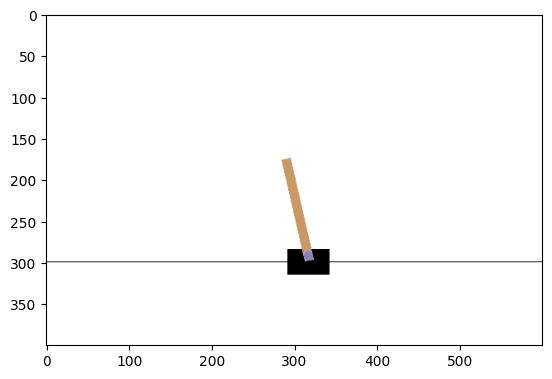

In [8]:
# together

episodes = 5 # epoch but its one full game
for episodes in range(1, episodes+1):
    env.reset() # reset enviroment, also gets the observations for each eviroment, random seed
    terminated = False
    score = 0
    
    while not terminated:
        env.render() # view the graphics, not workign in jupyter
        action = env.action_space.sample() # random action
        
        observation, reward, terminated, truncated, info = env.step(action) # get return values based on commands inputted
        
        score += reward # adding rewards, till game over
    
    print(f'Episode: {episodes}, Score {score}')
    show_frame(env)
    
env.close()

# at the moment its random so scores are ransom also

## Traning
* **Model Free**: Learns directly by interacting with enviroment without building model, trial and error (eg. Q-lEarning)
* Model Based: RL building predictive model of the enviroment and uses to plan actions, more sample efficient but more computationally heavier.
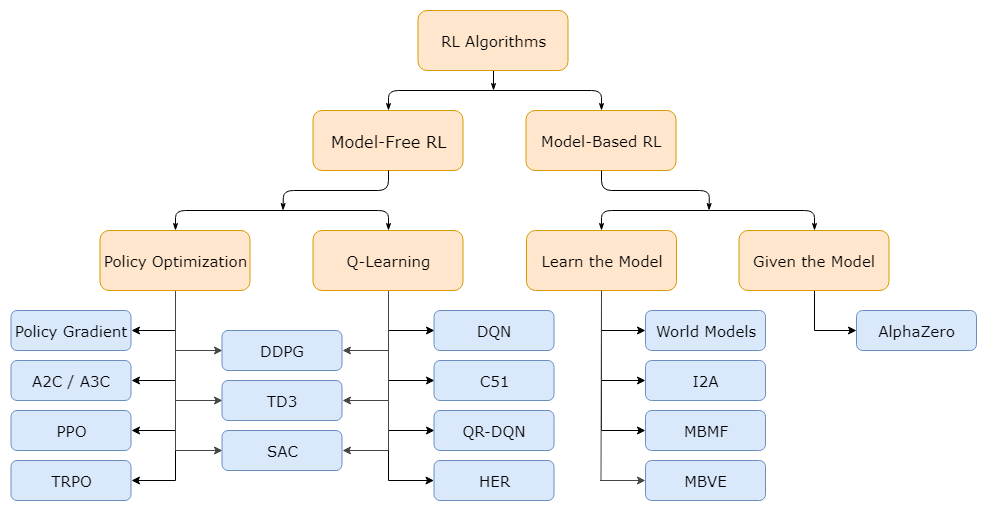

### Some algorithms are better than others in situations:
* Discrete Simple Process: `DQN`
* Discrete Multi Processed: `PPO` or `A2C`
* Continuous Single Process: `SAC` or `TD3`
* Continuous Multi Processed: `PPO` or `A2C`

### Traning Metrics
* Evaluation Metrics: 
    * `ep_len_mean`: avg time an episode lasted
    * `ep_rew_mean`: average reward of episodes
* Time Metrics: `fps`, `iterations`, `time_elapsed`
* Loss Metrics: `entropy_loss`, `policy_loss`, `value_loss`
* Other Metrics: `explained_variance`, `learning_rate`, `n_updates`

In [9]:
log_path = 'traning\\logs'

In [22]:

# Using PPO
env = gym.make(enviroment_name, render_mode="rgb_array")
env = DummyVecEnv([lambda: env]) # allows to work with enviement (wrapper for non vectorised envs)
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path) # MlpPolicy, Multi lever precepteron policy, each time itll make new folder in lofs

Using cuda device


C:\Users\safho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


* MlpPolicy: Multilayer preceprton
* CnnPolicy: Convolutional (For images)

In [23]:
model.learn(total_timesteps=20000) #more complex = more steps

Logging to traning\logs\PPO_5
-----------------------------
| time/              |      |
|    fps             | 777  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 620         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008117555 |
|    clip_fraction        | 0.0931      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | -0.00935    |
|    learning_rate        | 0.0003      |
|    loss                 | 6.19        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0154     |
|    value_loss           | 57.8        |
-----------------------------------------
----

- **`approx_kl`**: Approximate Kullback-Leibler divergence; measures the difference between the old and new policy distributions after an update. A low value indicates the policy hasn't changed drastically, which is desirable in stable learning.
- **`clip_fraction`**: Proportion of updates where the policy loss exceeded the clipping threshold. It indicates how often the policy is constrained by the clipping mechanism in PPO (Proximal Policy Optimization).
- **`clip_range`**: The range within which the policy updates are clipped to avoid excessive changes, ensuring stable learning.
- **`entropy_loss`**: Entropy of the policy; represents the randomness of the action distribution. A higher value indicates more exploration, while a lower value suggests the policy is becoming more deterministic.
- **`explained_variance`**: A metric for how well the value function predicts returns. Values close to 1 indicate excellent prediction, while values close to 0 suggest poor prediction.
- **`learning_rate`**: The rate at which the optimizer updates the model parameters during training.
- **`loss`**: Total loss, combining policy and value losses. It provides a measure of how well the model is performing overall.
- **`n_updates`**: Total number of gradient updates performed so far.
- **`policy_gradient_loss`**: The loss associated with the policy updates. Negative values suggest the policy is improving.
- **`value_loss`**: The loss associated with the value function. A higher value may indicate difficulty in predicting returns accurately.

In [12]:
PPO_Path = os.path.join('traning', 'models')
model.save(PPO_Path)

In [13]:
# del model # delete model 

In [14]:
# model = PPO.load(PPO_Path, env=env)

In [15]:
evaluate_policy(model, env, n_eval_episodes=10, render=True) #how many episodes, we will test for 10 eps

C:\Users\safho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
C:\Users\safho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


(483.3, 29.017408567961404)

## Test Model

In [19]:
obs = env.reset()
model.predict(obs) # 2 values, action, states

(array([0], dtype=int64), None)

In [27]:
episodes = 5
for episodes in range(1, episodes+1):
    obs = env.reset() # returns observations from last state, starting
    terminated = False
    score = 0
    
    while not terminated:
        #env.render()
        action, _ = model.predict(obs) # pass in observations instead of randomly doing it, using model, unpack
        # ex. based on the previous action you should now take this new action
        
        obs, reward, terminated, info = env.step(action) # get next observations
        
        score += reward # in the docs you can see for this model each action without the pole falling is 1.0 reward
    
    print(f'Episode: {episodes}, Score {score}')
    #show_frame(env)
    
env.close()

Episode: 1, Score [428.]
Episode: 2, Score [500.]
Episode: 3, Score [232.]
Episode: 4, Score [393.]
Episode: 5, Score [500.]


## View Logs in Tensorbaord
You'd want to do this from terminal as it locks up notebook
* make sure to install tensorboard

cmd: `tensorboard --logdir={file_location}`

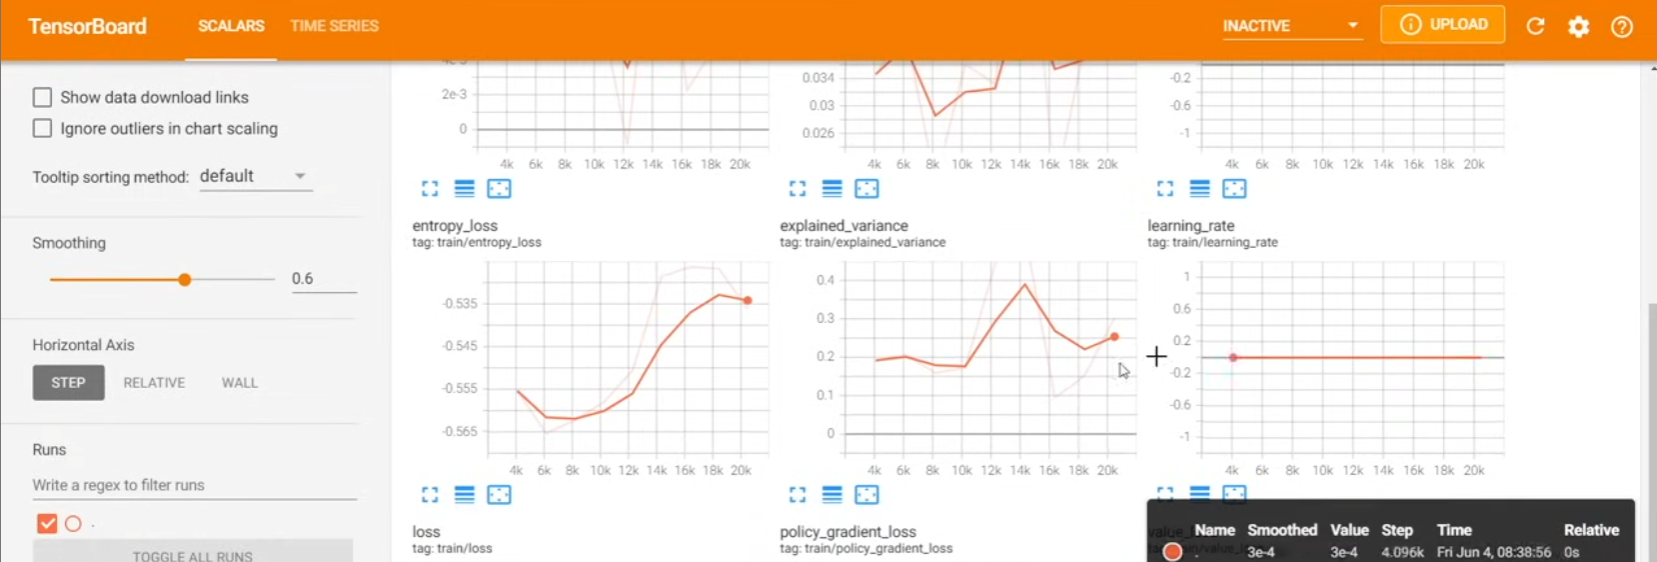

Main metrics to look at: 
* Average Reward
* Average Episode Length

## Callback to Traning
stop traning once you hit a benchmark (before you overfit)

In [36]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [37]:
save_path = os.path.join('traning', 'models')
save_path

'traning\\models'

In [38]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)
eval_callback = EvalCallback(env,
                             callback_on_new_best=stop_callback, # everytime there is a new best call stop_callback, and if it sees its part best stop
                             eval_freq=10000, # how frequently
                             best_model_save_path=save_path, # what you want model to be called
                             verbose=1)

In [39]:
model2 = PPO('MlpPolicy', env, tensorboard_log=log_path)

C:\Users\safho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [41]:
model2.learn(total_timesteps=20_000, callback=eval_callback) #assign callback

# Stops at 10,000 asm by then the score (reward) is above treshold (200)
# Also saved model into models folder

Eval num_timesteps=10000, episode_reward=500.00 +/- 0.00
Episode length: 500.00 +/- 0.00
New best mean reward!
Stopping training because the mean reward 500.00  is above the threshold 200


## Changing Policies (NN)
Changing units and layers in NN change

In [45]:
net_arch = [dict(pi=[128,128,128,128], vf=[128,128,128,128])] # new NN architechture, with 4 layers of   128 units

In [46]:
model2 = PPO('MlpPolicy', env, tensorboard_log=log_path, policy_kwargs={'net_arch': net_arch})
# stable baselines also hjas their own policies

C:\Users\safho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\stable_baselines3\common\policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(
C:\Users\safho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilizat

## Using Different Algorithm

In [48]:
from stable_baselines3 import DQN

In [51]:
model_dqn = DQN('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cuda device


In [53]:
model.learn(total_timesteps=20000)

Logging to traning\logs\PPO_9
-----------------------------
| time/              |      |
|    fps             | 616  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 534         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.006169306 |
|    clip_fraction        | 0.035       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.545      |
|    explained_variance   | -0.0116     |
|    learning_rate        | 0.0003      |
|    loss                 | 3.93        |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.00325    |
|    value_loss           | 39.4        |
-----------------------------------------
----

---
## Tips:

* Instead of DummyVec you can use SubprocessVec where you can do multiple at once
    * `env = SubprocVecEnv([lambda: gym.make(enviroment_name) for _ in range(8)])`
    * Must put in `if __name__ == '__main__':`

* When using GPU, by doing `model = PPO('CnnPolicy', env, device='cuda')`
    * Instead of being **1.2x** faster than cpu its **3.19x** 